In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/home/chaudha4/Projects/pyprojects/python-projects/data_analysis/ch03-medical-data-visualizer/medical_examination.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Clean data - Remove rows with height  less than the 2.5th percentile
print(df.height.quantile(0.025))
df1 = df [(df.height >= df.height.quantile(0.025))]
df1.head()

150.0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Clean data - Remove rows with diastolic pressure is higher then sys
df1 = df1 [(df1['ap_lo'] <= df1['ap_hi'])]
df1.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
# Clean data - Remove rows with height  more than the 97.5th percentile
print(df1.height.quantile(0.0975))
df1 = df1 [(df1.height <= df1.height.quantile(0.0975))]
df1.tail()

155.0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69923,99879,19784,1,153,65.0,150,90,1,1,0,0,0,1
69945,99923,21397,1,150,71.0,110,80,1,1,0,0,1,0
69963,99950,19538,2,155,76.0,130,90,1,1,0,0,1,0
69982,99973,18941,1,153,86.0,130,90,1,2,0,0,1,1
69987,99979,18852,1,151,49.0,120,80,1,1,0,0,1,0


In [6]:
# Clean Data - The right way. Do it all in one shot else your quartile calculations will be based on
# smaller datasets !!

df1 = df [ (df.height >= df.height.quantile(0.025)) &
           (df.height <= df.height.quantile(0.975)) &
           (df['ap_lo'] <= df['ap_hi']) &
           (df.weight >= df.weight.quantile(0.025)) &
           (df.weight <= df.weight.quantile(0.975))
         ]
df1.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


matplotlib.axes._subplots.AxesSubplot

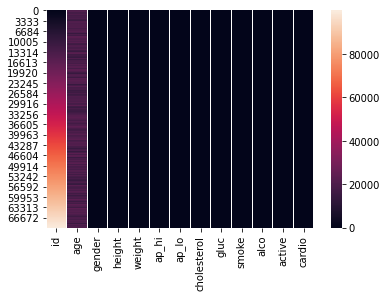

In [7]:
ax = sns.heatmap(df1)
type(ax)

In [ ]:
sns.heatmap(df1, annot=True)

In [ ]:
    # Calculate the correlation matrix
    corr = df1.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(9,9))
    
    sns.heatmap(corr,annot=True, fmt='.1f', linewidths=1, mask=mask, 
                vmax=.8, center=0.09,square=True, cbar_kws = {'shrink':0.5})